In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* The aim of the project is to build a model that can predict whether a person is Laying, Standing , Sitting, Walking, Walking_upstairs, or Walking_downstairs

* Initially, the information in this dataset is the measurements from the accelerometer, gyroscope, magnetometer, and GPS of the smartphone.

* The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist.

* there are 563 individual features(columns):
  * The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ . These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz.
  *  the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz.
  * the body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ) . Also the magnitude of these three-dimensional signals were calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag).
  * Finally a Fast Fourier Transform (FFT) was applied to some of these signals producing
fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag.

* These signals were used to estimate variables of the feature vector for each pattern:

  '-XYZ' is used to denote 3-axial signals in the X, Y and Z directions.

  * tBodyAcc-XYZ
  * tGravityAcc-XYZ
  * tBodyAccJerk-XYZ
  * tBodyGyro-XYZ
  * tBodyGyroJerk-XYZ
  * tBodyAccMag
  * tGravityAccMag
  * tBodyAccJerkMag
  * tBodyGyroMag
  * tBodyGyroJerkMag
  * fBodyAcc-XYZ
  * fBodyAccJerk-XYZ
  * fBodyGyro-XYZ
  * fBodyAccMag
  * fBodyAccJerkMag
  * fBodyGyroMag
  * fBodyGyroJerkMag`

* The set of variables that were estimated from these signals are:

  * mean(): Mean value
  * std(): Standard deviation
  * mad(): Median absolute deviation
  * max(): Largest value in array
  * min(): Smallest value in array
  * sma(): Signal magnitude area
  * energy(): Energy measure. Sum of the squares divided by the number of values.
  * iqr(): Interquartile range
  * entropy(): Signal entropy
  * arCoeff(): Autorregresion coefficients with Burg order equal to 4
  * correlation(): correlation coefficient between two signals
  * maxInds(): index of the frequency component with largest magnitude
  * meanFreq(): Weighted average of the frequency components to obtain a mean frequency
  * skewness(): skewness of the frequency domain signal
  * kurtosis(): kurtosis of the frequency domain signal
  * bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.
  * angle(): Angle between to vectors.

* Additional vectors obtained by averaging the signals in a signal window sample. These are used on the angle() variable:

  * gravityMean
  * tBodyAccMean
  * tBodyAccJerkMean
  * tBodyGyroMean
  * tBodyGyroJerkMean
   

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Loading and initial review

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/Datasets/test.csv')

In [ ]:
print('No of duplicates in train: {}'.format(sum(df_train.duplicated())))
print('No of duplicates in test : {}'.format(sum(df_test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [ ]:
print('We have {} NaN/Null values in train'.format(df_train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(df_test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [ ]:
df_train.shape,df_test.shape

((7352, 563), (2947, 563))

In [ ]:
columns = df_train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

df_train.columns = columns
df_test.columns = columns



### Data Exploration

Check for imbalanced dataset

<Axes: title={'center': 'Subjects'}, xlabel='subject', ylabel='count'>

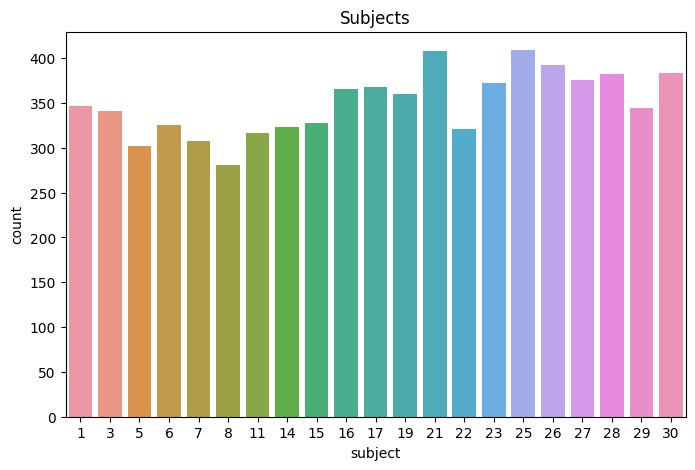

In [ ]:
plt.figure(figsize = (8,5))
plt.title('Subjects')
sns.countplot(x = 'subject', data = df_train)

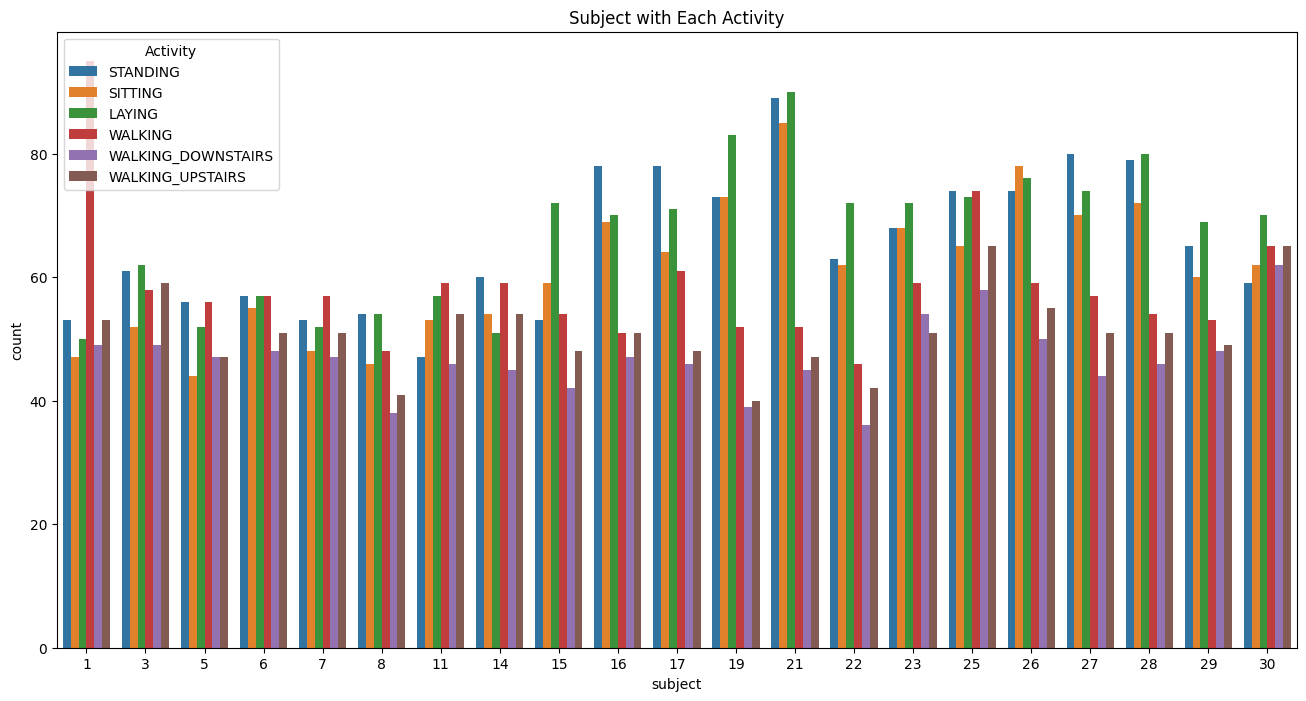

In [ ]:
plt.figure(figsize = (16,8))
plt.title("Subject with Each Activity")
sns.countplot(hue = 'Activity', x='subject',data = df_train);
plt.show()

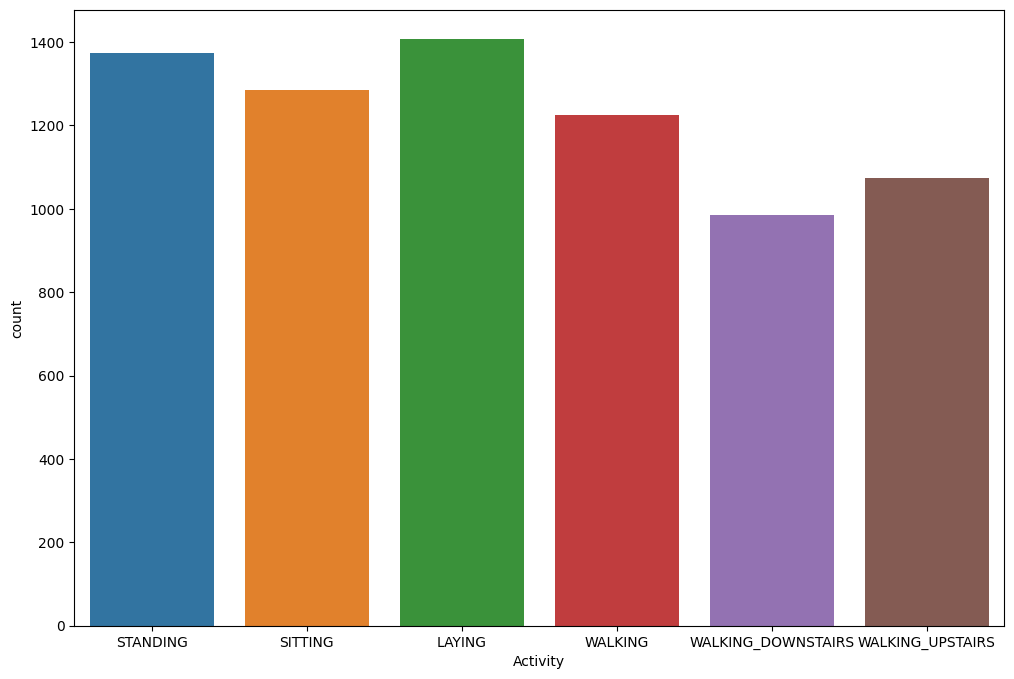

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'Activity', data = df_train);

 each subjects has almost equal or less amount of data. There is no any huge amount of gap between them.

Static and Dynamic Activites
* Static activities are (sit, stand, lie and down) thus there is no any motion of an object.
* Dynamic activities (Walking, WalkingUpStairs, WalkingDownStairs) motion info will be significant

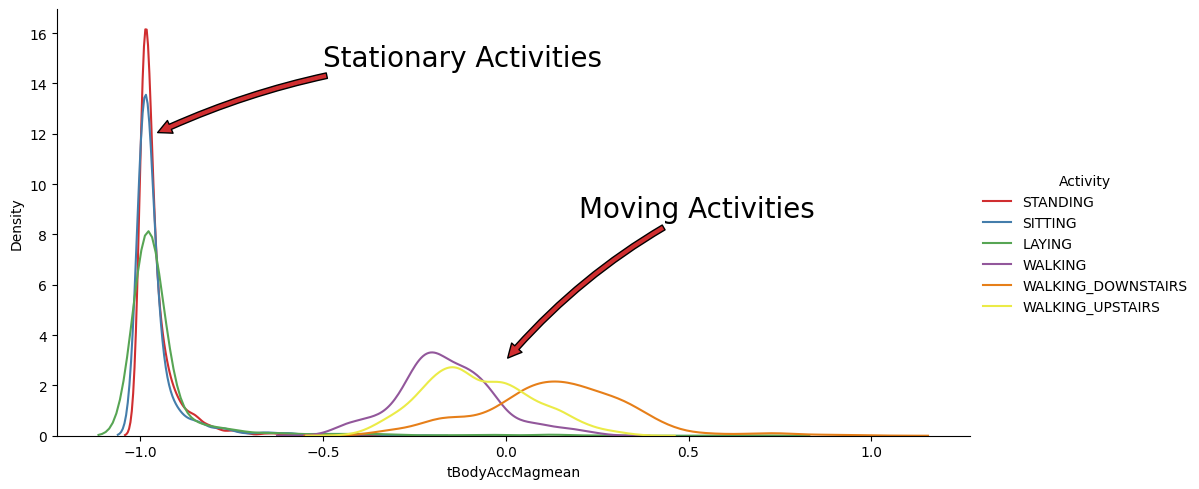

In [ ]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(df_train, hue='Activity', height=5,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.960,12), xytext=(-0.5, 15), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

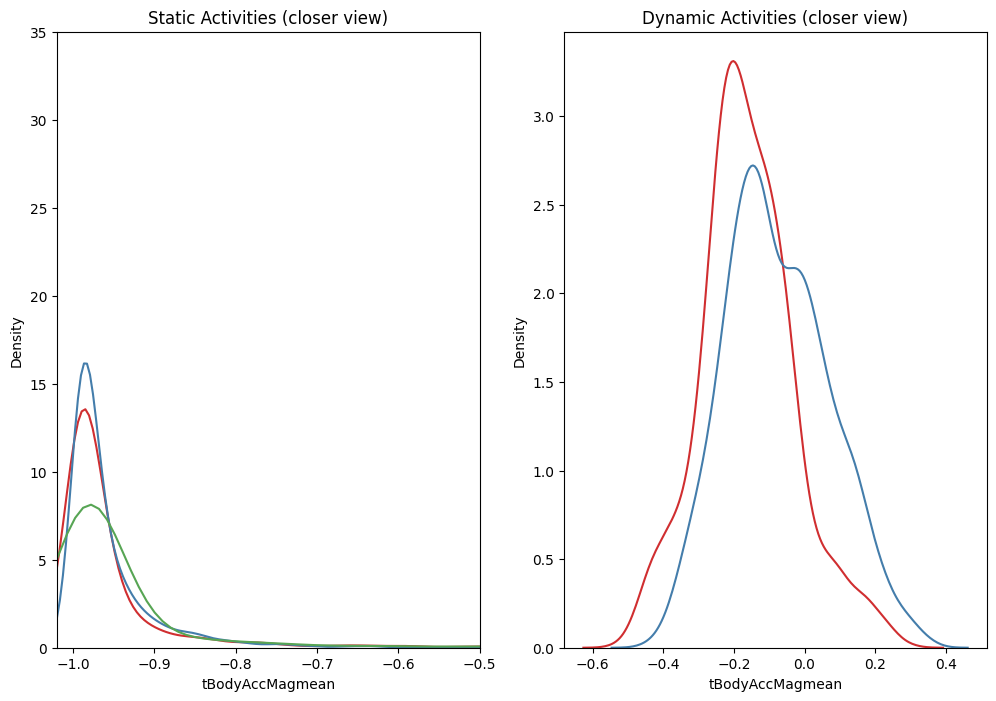

In [ ]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.title("Static Activities (closer view)")
sns.distplot(df_train[df_train["Activity"]=="SITTING"]['tBodyAccMagmean'], hist = False, label = 'Sitting');
sns.distplot(df_train[df_train["Activity"]=="STANDING"]['tBodyAccMagmean'], hist = False, label = 'Standing');
sns.distplot(df_train[df_train["Activity"]=="LAYING"]['tBodyAccMagmean'], hist = False, label = 'Laying');
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities (closer view)")
sns.distplot(df_train[df_train["Activity"]=="WALKING"]["tBodyAccMagmean"], hist = False, label ="Sitting");
sns.distplot(df_train[df_train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMagmean'], hist = False, label = 'Laying');

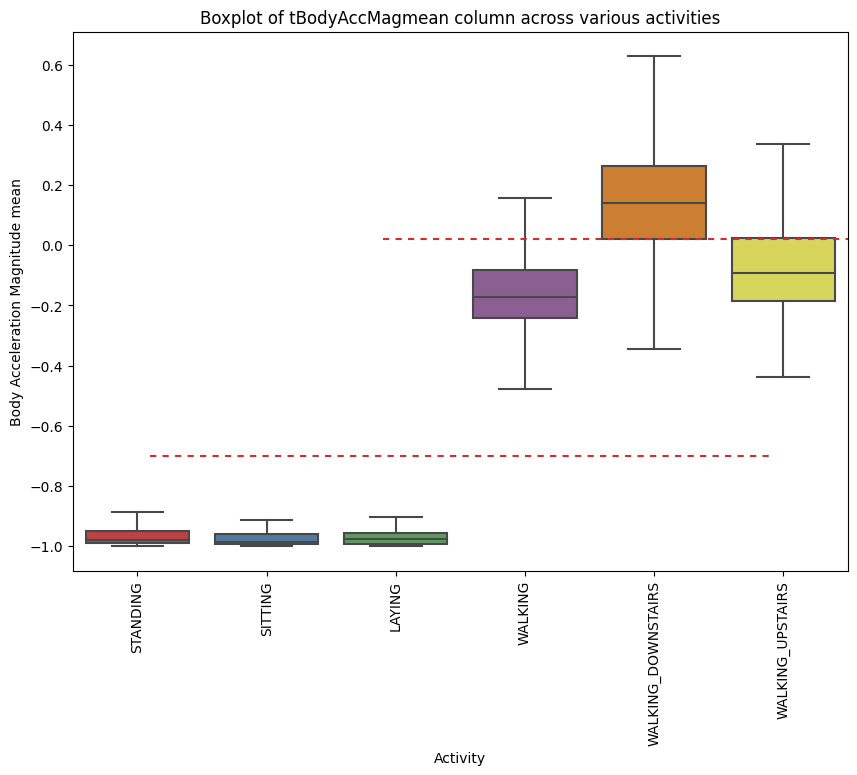

In [ ]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Activity', y ='tBodyAccMagmean', data = df_train, showfliers = False);
plt.ylabel('Body Acceleration Magnitude mean')
plt.title('Boxplot of tBodyAccMagmean column across various activities')
plt.axhline(y =- 0.7, xmin = 0.1, xmax = 0.9, dashes = (3,3))
plt.axhline(y = 0.020, xmin = 0.4, dashes = (3,3))
plt.xticks(rotation = 90)
plt.show()

Using boxplot agian, we can come with conditions to seperate static activities from dynamic activities.

* if(tBodyAccMagmean <= -0.8):
      Activity = "static"
 if(tBodyAccMagmean >= -0.6):
      Activity = "dynamic"

Also, we can easily seperate WALKING_DOWNSTAIRS activity from others using boxplot.

* if (tBodyAccMagmean > 0.02):
      Activity = "WALKING_DOWNSTARIS"
 else:
      Activity = "others"

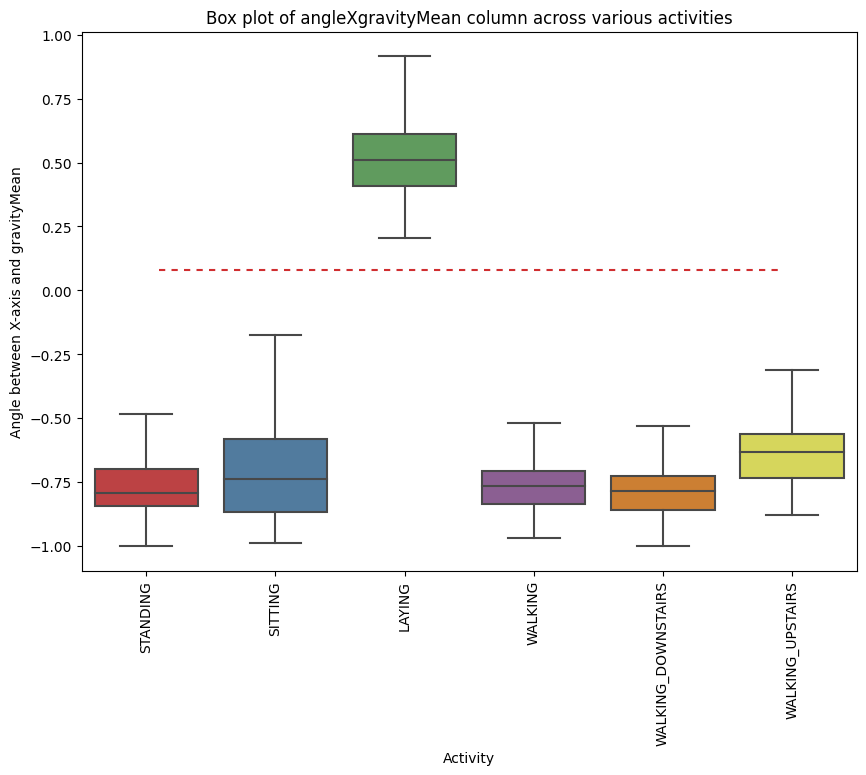

In [ ]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Activity', y = 'angleXgravityMean', data = df_train, showfliers = False)
plt.axhline(y = 0.08, xmin = 0.1 , xmax = 0.9, dashes = (3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title("Box plot of angleXgravityMean column across various activities")
plt.xticks(rotation = 90)
plt.show()

Observation:

* if(angleXgravityMean > 0.01):
      then Activity is Laying
We can classify all datapoints belonging to Laying activity with just a single if else statement

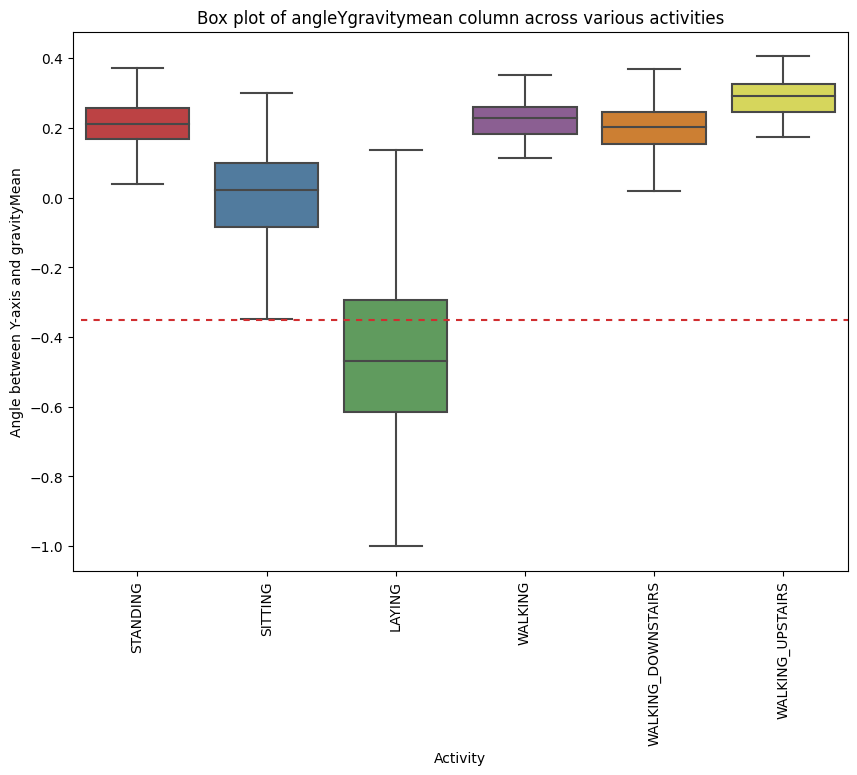

In [ ]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Activity', y = 'angleYgravityMean', data = df_train, showfliers = False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title("Box plot of angleYgravitymean column across various activities")
plt.xticks(rotation = 90)
plt.axhline(y = -0.35, xmin = 0.01, dashes = (3,3))
plt.show()

### Visualizing data using t-SNE

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.010s...
[t-SNE] Computed neighbors for 7352 samples in 2.475s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.090317
[t-SNE] KL divergence after 1000 iterations: 1.295007


<Axes: >

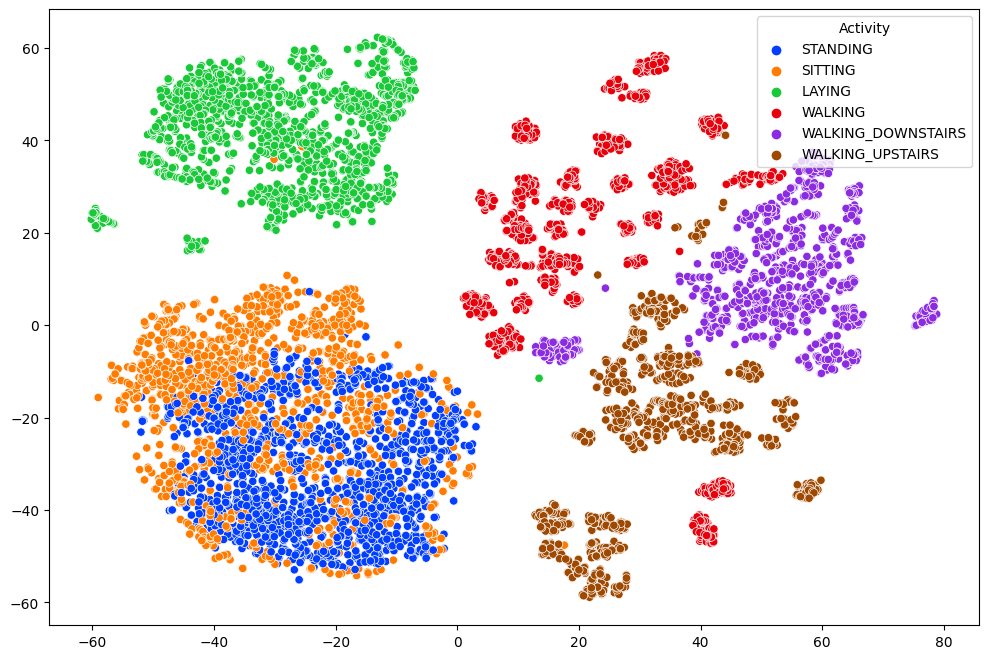

In [ ]:
X_for_tsne = df_train.drop(['subject','Activity'], axis = 1)
tsne = TSNE(random_state = 42, n_components = 2, verbose = 1, perplexity = 50, n_iter = 1000).fit_transform(X_for_tsne)
plt.figure(figsize = (12,8))
sns.scatterplot(x = tsne[:,0], y = tsne[:,1], hue = df_train["Activity"], palette = "bright")

### Model Building

In [ ]:
y_train = df_train.Activity
X_train = df_train.drop(['subject','Activity'], axis = 1)
y_test = df_test.Activity
X_test = df_test.drop(['subject','Activity'], axis = 1)
print('Training data size:', X_train.shape)
print('Test data size:', X_test.shape)

Training data size: (7352, 561)
Test data size: (2947, 561)


In [ ]:
model_score = pd.DataFrame(columns = ("Model","Score"))

In [ ]:
def print_pretty_cv_results(grid):
    df = pd.DataFrame(grid.cv_results_)[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')
    df['params'] = df['params'].apply(lambda param_dict: {k.replace('estimator__', ''): v for k, v in param_dict.items()})
    df.rename(columns={'mean_test_score': 'mean_val_score', 
                       'rank_test_score': 'rank_val_score'}, inplace=True)
    
    def highlight_equal(s, value, column):
        is_max = pd.Series(data=False, index=s.index)
        is_max[column] = s.loc[column] == value
        return ['background-color: lightyellow' if is_max.any() else '' for v in is_max]

    return df.head(15).style.apply(highlight_equal, value=1, column=['rank_val_score'], axis=1).hide_index()

Logistic regression model with Hyperparameter tuning and cross validation

In [ ]:
lr_classifier = LogisticRegression()

tuned_parameters = {'C':np.arange(10,61,10),'penalty':['l2','l1']}

log_grid = GridSearchCV(lr_classifier,
                        param_grid=tuned_parameters,
                        scoring='accuracy',
                        cv=5,  # 5 fold cross validation
                        n_jobs=-1,  # use all processors
                        refit=True,  # refit the best model on the full development set
                        return_train_score=True,
                        verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
print_pretty_cv_results(log_grid)

params,mean_train_score,mean_val_score,rank_val_score
"{'C': 50, 'penalty': 'l2'}",0.994083,0.933630,1
"{'C': 60, 'penalty': 'l2'}",0.994083,0.932542,2
"{'C': 20, 'penalty': 'l2'}",0.993641,0.932271,3
"{'C': 30, 'penalty': 'l2'}",0.993947,0.931182,4
"{'C': 10, 'penalty': 'l2'}",0.994287,0.930095,5
"{'C': 40, 'penalty': 'l2'}",0.993947,0.928461,6
"{'C': 10, 'penalty': 'l1'}",nan,nan,7
"{'C': 20, 'penalty': 'l1'}",nan,nan,7
"{'C': 30, 'penalty': 'l1'}",nan,nan,7
"{'C': 40, 'penalty': 'l1'}",nan,nan,7


In [ ]:
y_pred = log_grid.best_estimator_.predict(X_test)
accuracy_score(y_pred, y_test)

0.9592806243637597

In [ ]:
model_score = model_score.append(pd.DataFrame({'Model':["LogisticRegression"],'Score':[accuracy_score(y_pred, y_test)]}))

In [ ]:
## plotting confusion matrix

def plot_confusion_matrix(cm, lables):
    fig, ax = plt.subplots(figsize = (12,8))
    im = ax.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    ax.figure.colorbar(im, ax = ax)
    ax.set(xticks = np.arange(cm.shape[1]))
    yticks = np.arange(cm.shape[0])
    ylabel = 'True label'
    xlabel = 'Predicted label'
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i,j]), ha = "center", va = "center", color = "white" if cm[i,j]> thresh else "black")
            fig.tight_layout()

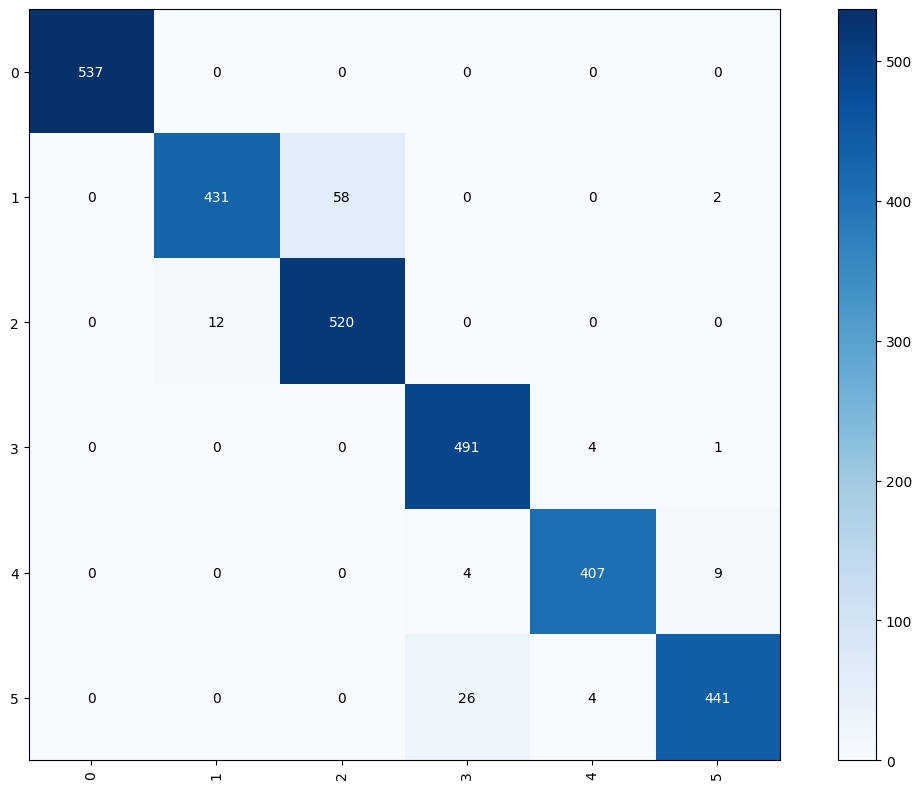

In [ ]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

Linear SVM model with Hyperparameter tuning and cross validation

In [ ]:
svm_classifier = LinearSVC(tol = 0.00005)

tuned_parameters = {'C': np.arange(1,12,2)}

svc_grid = GridSearchCV(svm_classifier,
                        param_grid=tuned_parameters,
                        scoring='accuracy',
                        cv=5,  # 5 fold cross validation
                        n_jobs=-1,  # use all processors
                        refit=True,  # refit the best model on the full development set
                        return_train_score=True,
                        verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [ ]:
print_pretty_cv_results(svc_grid)

params,mean_train_score,mean_val_score,rank_val_score
{'C': 1},0.996294,0.940840,1
{'C': 11},0.996124,0.940024,2
{'C': 9},0.996804,0.939208,3
{'C': 5},0.996566,0.938256,4
{'C': 3},0.996192,0.937847,5
{'C': 7},0.995069,0.937032,6


In [ ]:
y_pred = svc_grid.best_estimator_.predict(X_test)
accuracy_score(y_pred, y_test)

0.9691211401425178

In [ ]:
model_score = model_score.append(pd.DataFrame({'Model':["LinearSVM"],'Score':[accuracy_score(y_pred, y_test)]}))

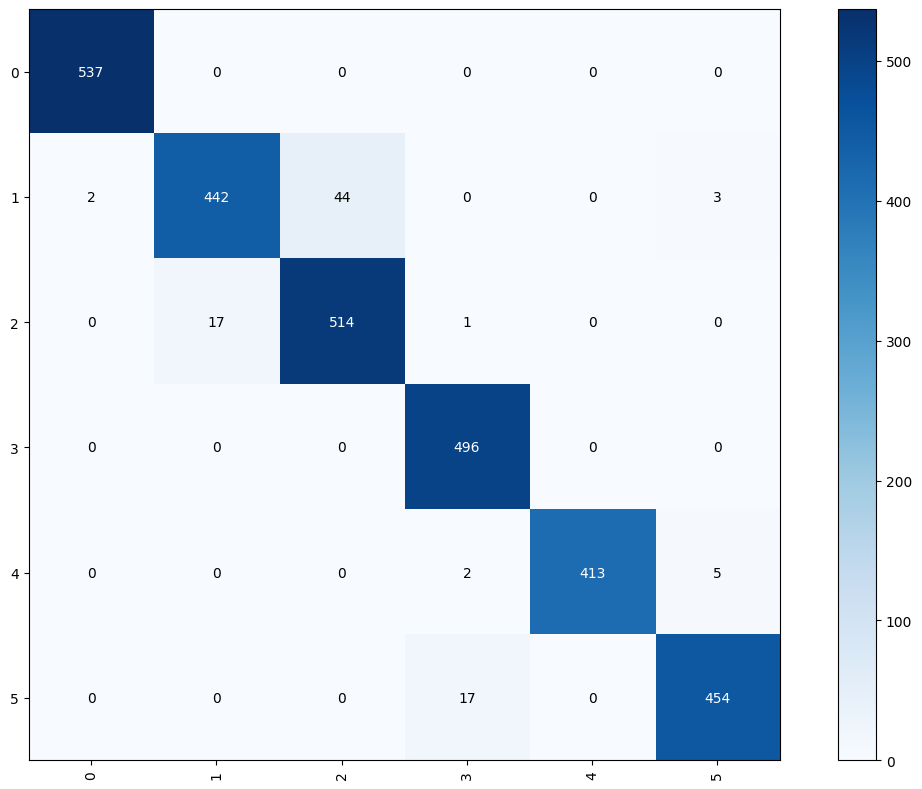

In [ ]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

Kernel SVM model with Hyperparameter tuning and cross validation

In [ ]:
svm_kernel_classifier =SVC(kernel = 'rbf')

tuned_parameters = {'C':[2,4,8,16], 'gamma':[0.125, 0.250, 0.5, 1]}

svm_kernel_grid = GridSearchCV(svm_kernel_classifier,
                        param_grid=tuned_parameters,
                        scoring='accuracy',
                        cv=5,  # 5 fold cross validation
                        n_jobs=-1,  # use all processors
                        refit=True,  # refit the best model on the full development set
                        return_train_score=True,
                        verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
print_pretty_cv_results(svm_kernel_grid)

params,mean_train_score,mean_val_score,rank_val_score
"{'C': 4, 'gamma': 0.125}",1.000000,0.896632,1
"{'C': 8, 'gamma': 0.125}",1.000000,0.896632,1
"{'C': 16, 'gamma': 0.125}",1.000000,0.896632,1
"{'C': 2, 'gamma': 0.125}",1.000000,0.896088,4
"{'C': 2, 'gamma': 0.25}",1.000000,0.738860,5
"{'C': 4, 'gamma': 0.25}",1.000000,0.738860,5
"{'C': 8, 'gamma': 0.25}",1.000000,0.738860,5
"{'C': 16, 'gamma': 0.25}",1.000000,0.738860,5
"{'C': 2, 'gamma': 0.5}",1.000000,0.385070,9
"{'C': 4, 'gamma': 0.5}",1.000000,0.385070,9


In [ ]:
y_pred = svm_kernel_grid.best_estimator_.predict(X_test)
accuracy_score(y_pred, y_test)

0.9423142178486597

In [ ]:
model_score = model_score.append(pd.DataFrame({'Model':["KernelSVM"],'Score':[accuracy_score(y_pred, y_test)]}))

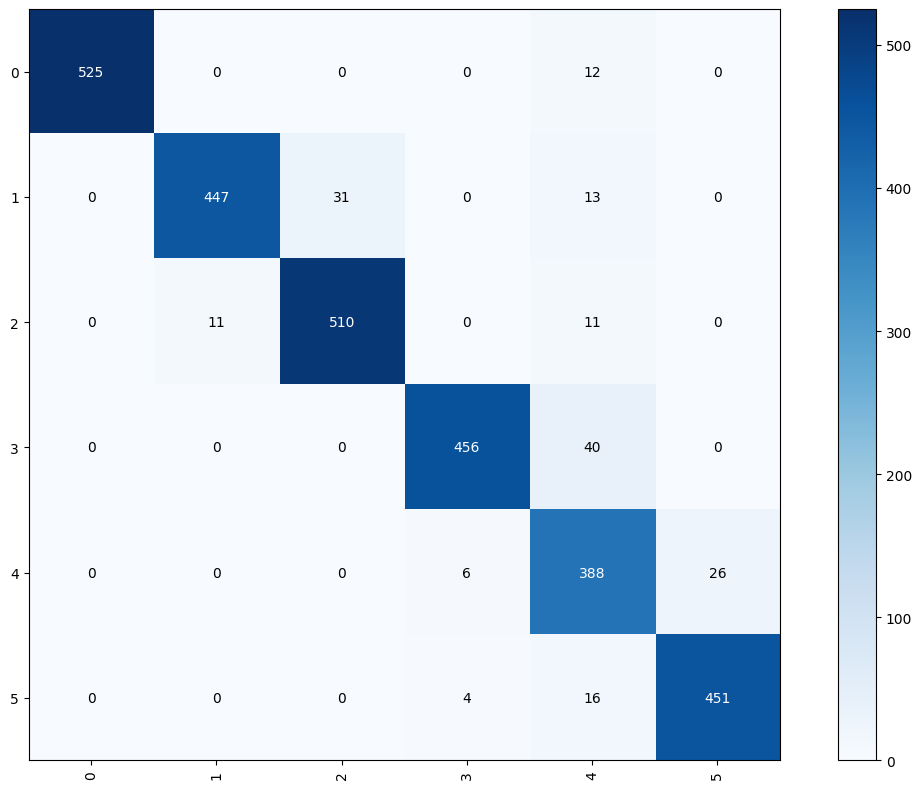

In [ ]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

Decision tree model with Hyperparameter tuning and cross validation

In [ ]:
dt_classifier = DecisionTreeClassifier()

tuned_parameters = {'max_depth':np.arange(2,10,2)}

dt_grid = GridSearchCV(dt_classifier,
                        param_grid=tuned_parameters,
                        scoring='accuracy',
                        cv=5,  # 5 fold cross validation
                        n_jobs=-1,  # use all processors
                        refit=True,  # refit the best model on the full development set
                        return_train_score=True,
                        verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
print_pretty_cv_results(dt_grid)

params,mean_train_score,mean_val_score,rank_val_score
{'max_depth': 6},0.944913,0.853103,1
{'max_depth': 8},0.982692,0.849572,2
{'max_depth': 4},0.899449,0.837873,3
{'max_depth': 2},0.545022,0.544750,4


In [ ]:
y_pred = dt_grid.best_estimator_.predict(X_test)
accuracy_score(y_pred, y_test)

0.8571428571428571

In [ ]:
model_score = model_score.append(pd.DataFrame({'Model':["DecisionTrees"],'Score':[accuracy_score(y_pred, y_test)]}))

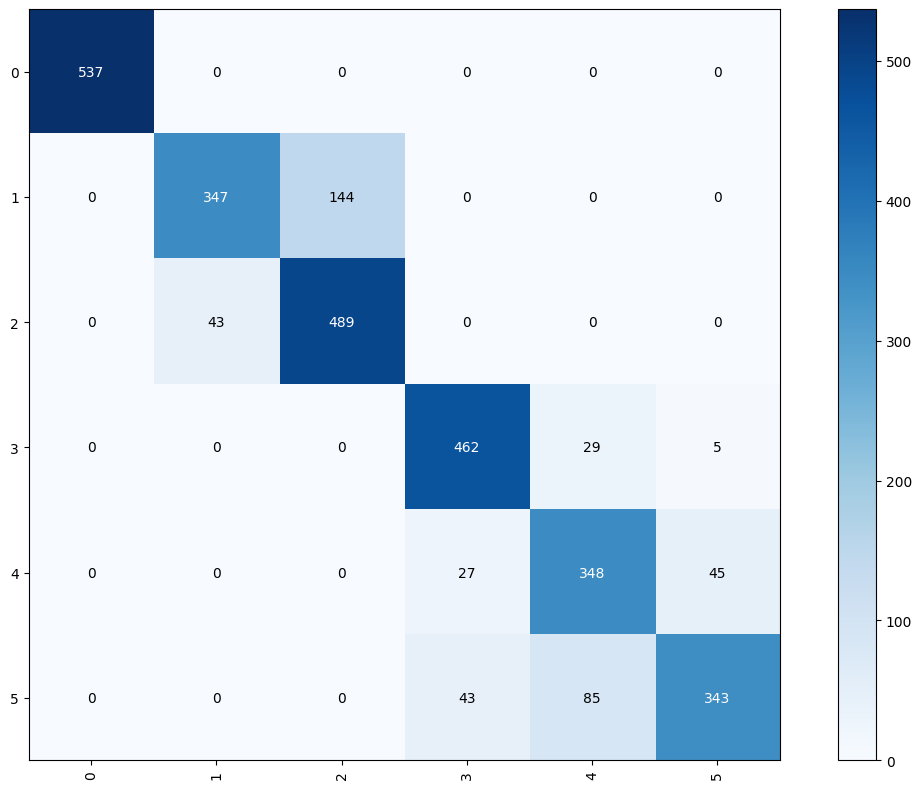

In [ ]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

Random Forest model using Hyperparameter tuning and cross validation

In [ ]:
rf_classifier = RandomForestClassifier()

tuned_parameters = {'n_estimators': np.arange(20,101,10), 'max_depth':np.arange(2,16,2)}

rf_grid = GridSearchCV(rf_classifier,
                        param_grid=tuned_parameters,
                        scoring='accuracy',
                        cv=5,  # 5 fold cross validation
                        n_jobs=-1,  # use all processors
                        refit=True,  # refit the best model on the full development set
                        return_train_score=True,
                        verbose=True).fit(X_train, y_train)

In [ ]:
print_pretty_cv_results(rf_grid)

params,mean_train_score,mean_val_score,rank_val_score
"{'max_depth': 10, 'n_estimators': 100}",0.997144,0.921795,1
"{'max_depth': 12, 'n_estimators': 50}",0.999252,0.920434,2
"{'max_depth': 14, 'n_estimators': 30}",0.999864,0.920026,3
"{'max_depth': 8, 'n_estimators': 30}",0.988235,0.919756,4
"{'max_depth': 10, 'n_estimators': 30}",0.996056,0.919617,5
"{'max_depth': 14, 'n_estimators': 80}",0.999966,0.919346,6
"{'max_depth': 8, 'n_estimators': 80}",0.989527,0.919075,7
"{'max_depth': 10, 'n_estimators': 90}",0.996770,0.918802,8
"{'max_depth': 12, 'n_estimators': 80}",0.999218,0.917985,9
"{'max_depth': 14, 'n_estimators': 40}",0.999898,0.917985,10


In [ ]:
y_pred = rf_grid.best_estimator_.predict(X_test)
accuracy_score(y_pred, y_test)

0.9189005768578216

In [ ]:
model_score = model_score.append(pd.DataFrame({'Model':["RandomForest"],'Score':[accuracy_score(y_pred, y_test)]}))

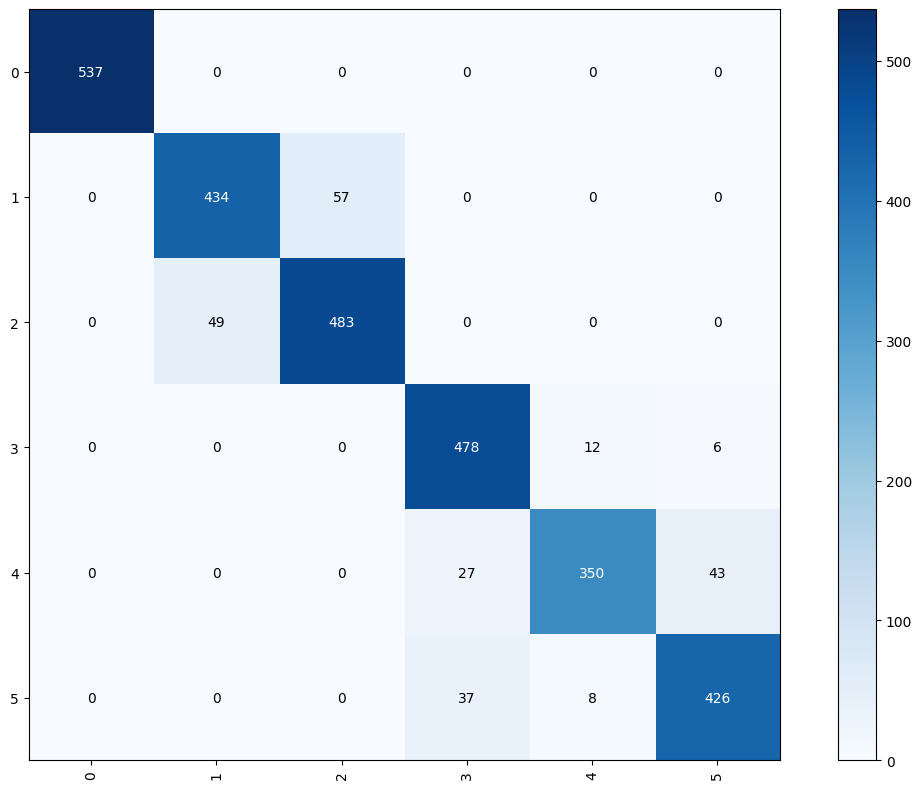

In [ ]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [ ]:
model_score.head()

,Model,Score
0,LogisticRegression,0.959281
0,LinearSVM,0.969121
0,KernelSVM,0.942314
0,DecisionTrees,0.857143
0,RandomForest,0.918901


## Using PCA

To evaluate the performance with lesser dimension data.

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=None)) 
])

df_train_pca=pipeline.fit_transform(X_train)
df_test_pca=pipeline.transform(X_test)

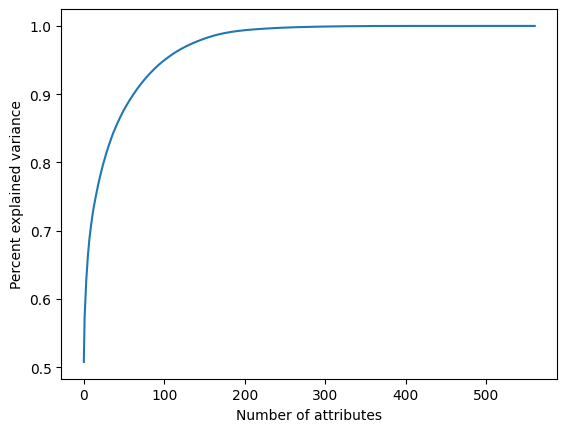

In [ ]:
plt.xlabel('Number of attributes')
plt.ylabel('Percent explained variance')
plt.plot(np.cumsum(pipeline.named_steps['pca'].explained_variance_ratio_))
plt.show()

The right number of attributes are anywhere between 100-150. For convience we'll go with 120

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=120))  # Set the desired number of components for PCA
])

X_train=pipeline.fit_transform(X_train)
X_test=pipeline.transform(X_test)

In [ ]:
cf1=LogisticRegression()
cf2=LinearSVC(tol = 0.00005)
cf3=SVC(kernel = 'rbf')
cf4=DecisionTreeClassifier()
cf5=RandomForestClassifier()

models=[cf1,cf2,cf3,cf4,cf5]        

param_grid = [
    {
        'penalty': ['l1', 'l2'],  # Hyperparameters for LogisticRegression
        'C': np.arange(10,61,10)
    },
    {
        'C':  np.arange(1,12,2),  # Hyperparameters for LinearSVC
        'tol': [0.00005, 0.0001, 0.001]
    },
    {
        'C': [2,4,8,16],  # Hyperparameters for SVC
        'gamma':[0.125, 0.250, 0.5, 1]
    },
    {
        'max_depth':np.arange(2,10,2),  # Hyperparameters for DecisionTreeClassifier
        'min_samples_split': [2, 5, 10]
    },
    {
        'n_estimators': np.arange(20,101,10),  # Hyperparameters for RandomForestClassifier
        'max_depth': np.arange(2,16,2)
    }
]


# Perform grid search for each model
for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5)
    grid_search.fit(X_train, y_train)  
    print("Best parameters for model", i+1, ":", grid_search.best_params_)
    print("Best score for model", i+1, ":", grid_search.best_score_)
    print()


Best parameters for model 1 : {'C': 20, 'penalty': 'l2'}
Best score for model 1 : 0.9182609821630896

Best parameters for model 2 : {'C': 1, 'tol': 0.0001}
Best score for model 2 : 0.9100993816969343

Best parameters for model 3 : {'C': 2, 'gamma': 0.125}
Best score for model 3 : 0.1917844772171275

Best parameters for model 4 : {'max_depth': 8, 'min_samples_split': 5}
Best score for model 4 : 0.7456537040376994

Best parameters for model 5 : {'max_depth': 14, 'n_estimators': 100}
Best score for model 5 : 0.85731757284831



In [ ]:
y_train = df_train.Activity
X_train = df_train.drop(['subject','Activity'], axis = 1)
y_test = df_test.Activity
X_test = df_test.drop(['subject','Activity'], axis = 1)

In [ ]:
results_df = pd.DataFrame(columns=['Model', 'Accuracy'])

# Define the models with the specified parameters
Logistic_Reg = LogisticRegression(C=20, penalty='l2')
Linear_SVC = LinearSVC(C=1, tol=0.0001)
SVC_kernel = SVC(C=2, gamma=0.125)
DTs = DecisionTreeClassifier(max_depth=8, min_samples_split=5)
Rf = RandomForestClassifier(max_depth=14, n_estimators=100)

models = [Logistic_Reg,Linear_SVC,SVC_kernel,DTs,Rf]

# Iterate over the models
for i, model in enumerate(models):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=120)),
        ('model', model)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Transform the test data using the individual steps in the pipeline
    X_test_scaled = pipeline.named_steps['scaler'].transform(X_test)
    X_test_transformed = pipeline.named_steps['pca'].transform(X_test_scaled)

    
    # Predict using the model
    y_pred = pipeline.named_steps['model'].predict(X_test_transformed)


    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append the results to the dataframe
    model_name = model
    results_df = results_df.append({'Model': model_name, 'Accuracy': accuracy}, ignore_index=True)

results_df

,Model,Accuracy
0,LogisticRegression(C=20),0.938582
1,LinearSVC(C=1),0.931116
2,"SVC(C=2, gamma=0.125)",0.182559
3,"DecisionTreeClassifier(max_depth=8, min_sample...",0.765185
4,"(DecisionTreeClassifier(max_depth=14, max_feat...",0.885646


From the results it is evident that using PCA does't helps with getting the results except for the first two models which have slight lesser accuracy for a lesser dimension data.